#                                     Loan_Default_Prediction

# Problem Statement

## Introduction
The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (too risky applicants) at a higher interest rate, etc. We required to solve this real business problems with help of ML Model. In this case study, apart from applying the techniques of ML model, We will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (too risky applicants) at a higher interest rate, etc.


### Importing all required libraries.

In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

#### Read Data

In [3]:
# Reading CSV file
df = pd.read_csv("E:\\5_New_Job\\Loan_Default_Prediction\\loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Data Analysis

In [4]:
df.shape

(39717, 111)

In [5]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Checking for duplicate rows in the dataset based on ID column.
df.duplicated(subset=None, keep='first').count()
duplicate = df[df.duplicated(['id'])]
duplicate

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


## Data Cleaning

In [8]:
print('Number of empty rows:')
df.isnull().all(axis=1).sum()

Number of empty rows:


0

In [9]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
verification_status_joint,39717,100.0
annual_inc_joint,39717,100.0
mo_sin_old_rev_tl_op,39717,100.0
mo_sin_old_il_acct,39717,100.0
bc_util,39717,100.0
...,...,...
delinq_amnt,0,0.0
policy_code,0,0.0
earliest_cr_line,0,0.0
delinq_2yrs,0,0.0


In [10]:
x = df.columns[100*(df.isnull().sum()/len(df.index)) > 90]

df = df.drop(x, axis=1)

In [11]:
df.shape

(39717, 55)

In [12]:
Total = df.isnull().sum().sort_values(ascending=False) 
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data.head(15)

,Total,Percentage of Missing Values
mths_since_last_delinq,25682,64.662487
desc,12940,32.580507
emp_title,2459,6.191303
emp_length,1075,2.706650
pub_rec_bankruptcies,697,1.754916
last_pymnt_d,71,0.178765
chargeoff_within_12_mths,56,0.140998
collections_12_mths_ex_med,56,0.140998
revol_util,50,0.125891
tax_liens,39,0.098195


In [13]:
df = df.drop(['desc', 'mths_since_last_delinq'], axis=1)

In [14]:
df.shape

(39717, 53)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [16]:
# Columns "member_id", "url", "emp_title", "zip_code" and "tax_liens" are not important for our analysis, so we can drop these columns.
columns_drop =  ["member_id", "url", "emp_title", "zip_code", "tax_liens"]
df.drop(labels = columns_drop, axis = 1, inplace = True)

In [17]:
df.shape

(39717, 48)

In [18]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [19]:
df['int_rate'] = df['int_rate'].str.rstrip('%')
df['revol_util'] = df['revol_util'].str.rstrip('%')

In [20]:
df.emp_length.fillna('0',inplace=True)

# Using regular expression to extract numeric values from the string
df['emp_length'] = df['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

#Convert into integer
df['emp_length'] = df['emp_length'].apply(lambda x: pd.to_numeric(x))

In [21]:
df['term'] = df['term'].apply(lambda x: re.findall('\d+', str(x))[0])

In [22]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [23]:
df['emp_length']

0        10
1         1
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     1
39715     1
39716     1
Name: emp_length, Length: 39717, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int64  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Thus, going forward, we will use only the other two types of variables.

In [25]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [328]:
df1 = df.drop(behaviour_var, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int64  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [329]:
df1.shape

(39717, 27)

Dealing with other missing value

In [330]:
Total = df1.isnull().sum().sort_values(ascending=False) 
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data.head(15)

,Total,Percentage of Missing Values
pub_rec_bankruptcies,697,1.754916
chargeoff_within_12_mths,56,0.140998
collections_12_mths_ex_med,56,0.140998
title,11,0.027696
loan_status,0,0.000000
delinq_amnt,0,0.000000
acc_now_delinq,0,0.000000
policy_code,0,0.000000
initial_list_status,0,0.000000
dti,0,0.000000


In [331]:
df1.isnull().columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'title', 'addr_state', 'dti',
       'initial_list_status', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [332]:
#We replace missing values with Median since
df1['pub_rec_bankruptcies'] = df1['pub_rec_bankruptcies'].fillna(df1['pub_rec_bankruptcies'].median())

In [333]:
df1['chargeoff_within_12_mths'] = df1['chargeoff_within_12_mths'].fillna(df1['chargeoff_within_12_mths'].median())
df1['collections_12_mths_ex_med'] = df1['collections_12_mths_ex_med'].fillna(df1['collections_12_mths_ex_med'].median())

In [334]:
#We replace the categorical variables with the mode
df1['title'] = df1['title'].fillna(df1['title'].mode()[0])

In [335]:
df2 = df1

In [336]:
Total = df2.isnull().sum().sort_values(ascending=False) 
Percent = (df2.isnull().sum()*100/df2.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data.head(15)

,Total,Percentage of Missing Values
id,0,0.0
loan_status,0,0.0
delinq_amnt,0,0.0
chargeoff_within_12_mths,0,0.0
acc_now_delinq,0,0.0
policy_code,0,0.0
collections_12_mths_ex_med,0,0.0
initial_list_status,0,0.0
dti,0,0.0
addr_state,0,0.0


In [337]:
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,title,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Computer,AZ,27.65,f,0.0,1,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,bike,GA,1.00,f,0.0,1,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,real estate business,IL,8.72,f,0.0,1,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,personel,CA,20.00,f,0.0,1,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,Personal,OR,17.94,f,0.0,1,0,0.0,0,0.0


In [338]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int64  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [339]:
#Object type column
list(df2.select_dtypes(['object']).columns)

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status']

In [340]:
# convert to numeric
df2['term'] = df2['term'].apply(lambda x: pd.to_numeric(x))

In [341]:
df2[['int_rate','dti']] = df2[['int_rate','dti']].apply(lambda x: pd.to_numeric(x))

In [342]:
df2[['loan_amnt','funded_amnt','installment']] = df2[['loan_amnt','funded_amnt','installment']].apply(lambda x: pd.to_numeric(x))

In [343]:
df2['collections_12_mths_ex_med'] = df2['collections_12_mths_ex_med'].apply(lambda x: pd.to_numeric(x))

In [344]:
list(df2.select_dtypes(['object']).columns)

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'initial_list_status']

In [345]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  int64  
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int64  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

Now all missing values have been replaced and 27 columns remain even after dropping unimportant columns.

#### Correlation

In order to compute the correlation matrix, we perform the following:

                1. Filter out only the numeric variables from the dataframe using select_dtypes() function<br>
                2. Call the corr() function which will return the correlation matrix of numeric variables <br>
                3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix

In [346]:
df_num_features = df2.select_dtypes(include=np.number)
df_num_features.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [347]:
corr =  df_num_features.corr()

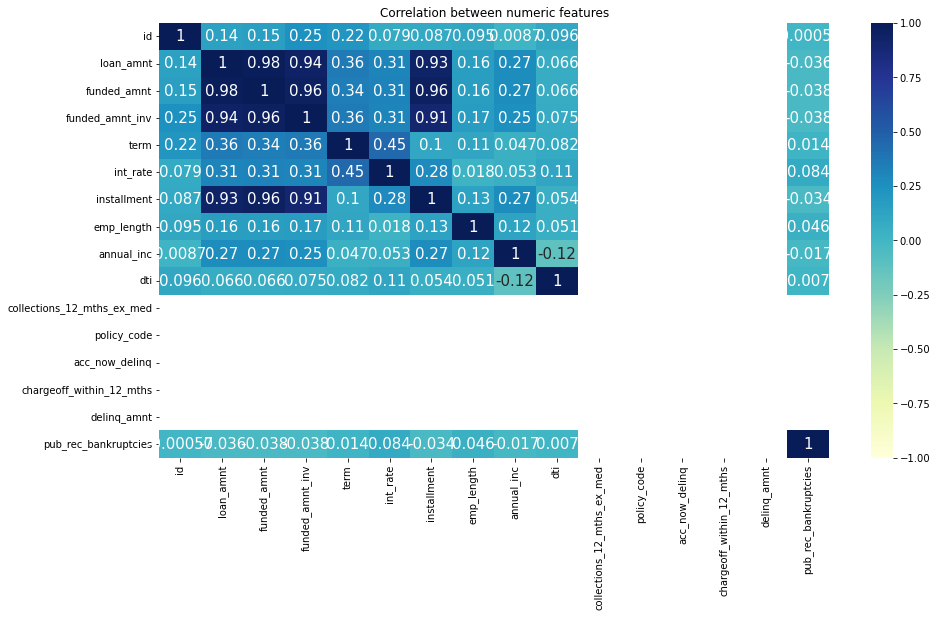

In [348]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )
plt.title('Correlation between numeric features')
plt.show()

In [349]:
df2.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,title,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,...,Computer,AZ,27.65,f,0.0,1,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,...,bike,GA,1.00,f,0.0,1,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,...,real estate business,IL,8.72,f,0.0,1,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,...,personel,CA,20.00,f,0.0,1,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,...,Personal,OR,17.94,f,0.0,1,0,0.0,0,0.0


# Data Analysis on Loan Dataset

#### Dependent variable

In [350]:
(df2.loan_status.value_counts()*100)/len(df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [351]:
# For ML model, current loans we will consider as Charged Off for factor of safety.                        
df2['loan_status'] = df2['loan_status'].replace('Current', 'Charged Off')

In [352]:
(df2.loan_status.value_counts()*100)/len(df)

Fully Paid     82.961956
Charged Off    17.038044
Name: loan_status, dtype: float64

In [353]:
df2['loan_status'] = df2['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

# converting loan_status to integer type
df2['loan_status'] = df2['loan_status'].apply(lambda x: pd.to_numeric(x))

df2['loan_status'].value_counts()

0    32950
1     6767
Name: loan_status, dtype: int64

In [354]:
# Dependent variable is loan status and independent variables are grade, sub grade, term, home ownership, verification status, purpose, year, month, loan amnt, funded amnt inv,  
# int_rate, dti (debt to income ratio), installment, annual_inc, emp_length. 

In [355]:
#loan status basic statistics
df2['loan_status'].describe()

count    39717.000000
mean         0.170380
std          0.375971
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [356]:
#loan status count
df2['loan_status'].value_counts()

0    32950
1     6767
Name: loan_status, dtype: int64

In [357]:
#loan amount basic statistics
df2['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# Univariate Analysis

<AxesSubplot:xlabel='loan_amnt'>

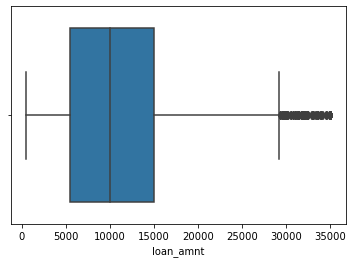

In [288]:
#loan amount boxplot
sns.boxplot(df2.loan_amnt)

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

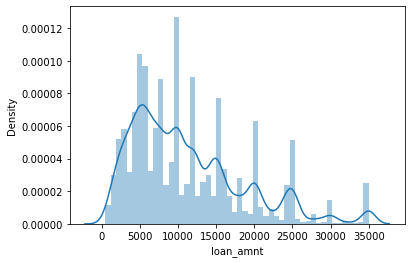

In [289]:
#loan amount distplot
sns.distplot(df2["loan_amnt"])

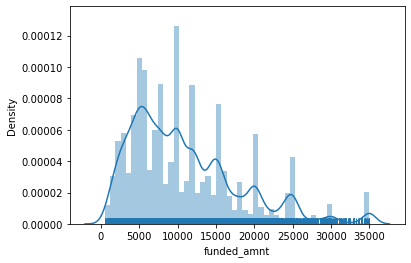

In [290]:
#fumded amount distplot
ax = sns.distplot(df['funded_amnt'],rug = True)

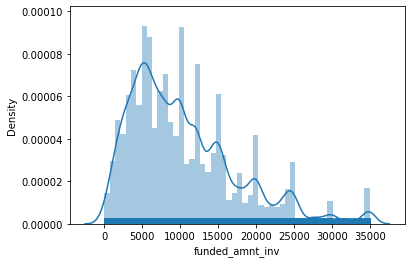

In [291]:
#funded amount inv, distplot
ax = sns.distplot(df2['funded_amnt_inv'],rug = True)

In [292]:
#loan amount count of values
df2['loan_amnt'].value_counts()

10000    2833
12000    2334
5000     2051
6000     1908
15000    1895
         ... 
22875       1
8175        1
19475       1
21225       1
22550       1
Name: loan_amnt, Length: 885, dtype: int64

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

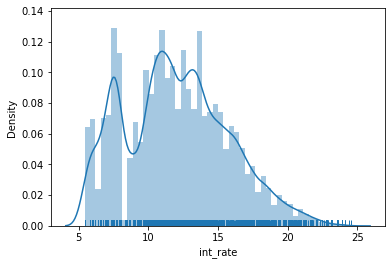

In [293]:
#interest rate distplot
sns.distplot(df2['int_rate'],rug = True)

In [294]:
# Bar graph for loan status and loan amount.
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df2['loan_amnt'] = df2['loan_amnt'].apply(lambda x: loan_amount(x))

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

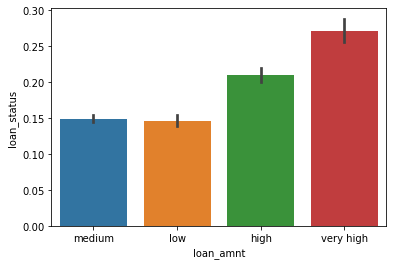

In [295]:
sns.barplot(x="loan_amnt", y='loan_status', data=df2)

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

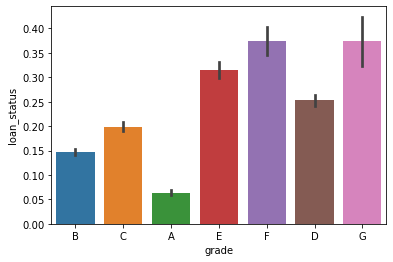

In [296]:
# Bar graph for loan status and grade.
sns.barplot(x='grade', y='loan_status', data=df2)

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

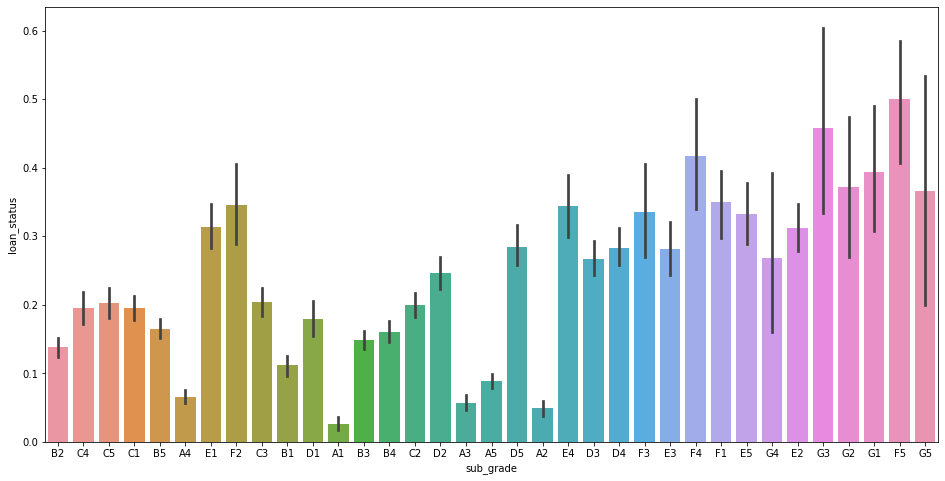

In [297]:
# Bar graph for loan status and sub grade.
plt.figure(figsize=(16, 8))
sns.barplot(x='sub_grade', y='loan_status', data=df2)

<AxesSubplot:xlabel='term', ylabel='loan_status'>

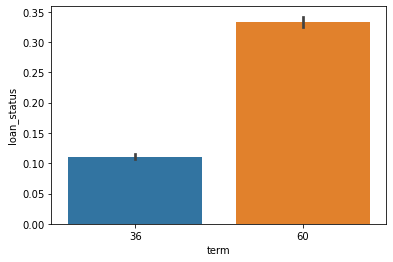

In [298]:
# Bar graph for loan status and term.
sns.barplot(x='term', y='loan_status', data=df2)

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

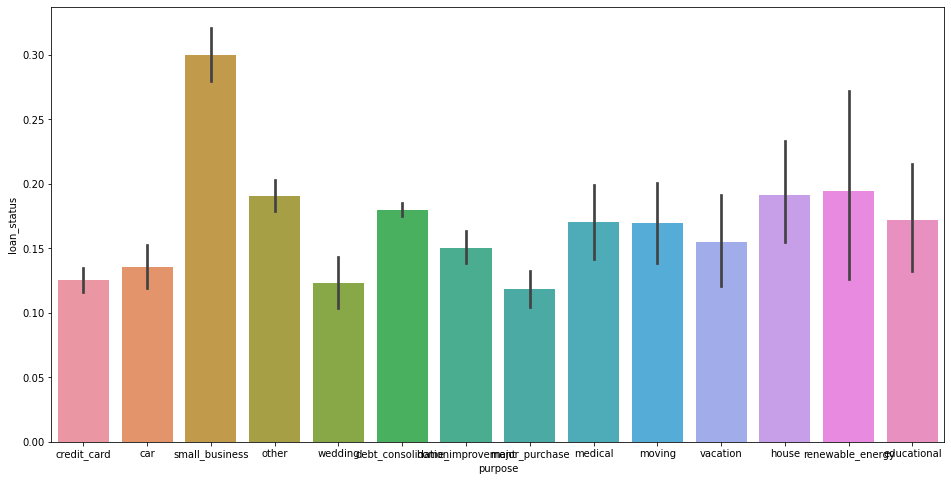

In [299]:
# Bar graph for loan status and purpose.
plt.figure(figsize=(16, 8))
sns.barplot(x='purpose', y='loan_status', data=df2)

<AxesSubplot:xlabel='verification_status', ylabel='loan_status'>

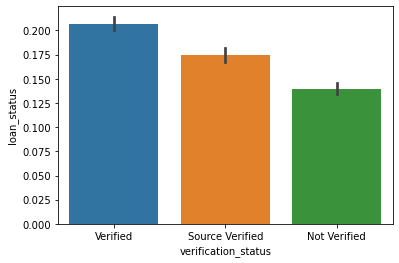

In [300]:
# Bar graph for loan status and verification status.
sns.barplot(x='verification_status', y='loan_status', data=df2)

<AxesSubplot:xlabel='home_ownership', ylabel='loan_status'>

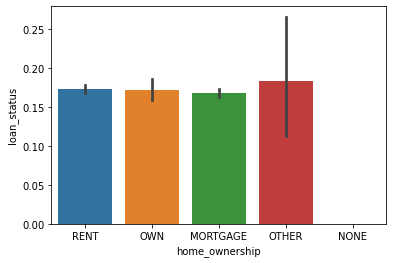

In [301]:
# Bar graph for loan status and home ownership.

sns.barplot(x='home_ownership', y='loan_status', data=df2)

<AxesSubplot:xlabel='loan_amnt', ylabel='loan_status'>

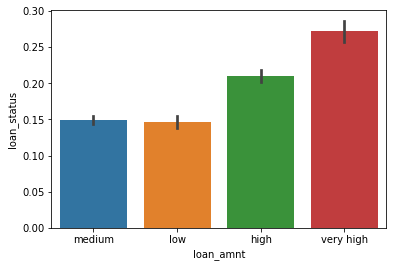

In [302]:
# Bar graph for loan status and loan amount.
sns.barplot(x="loan_amnt", y='loan_status', data=df2)

<AxesSubplot:xlabel='dti', ylabel='loan_status'>

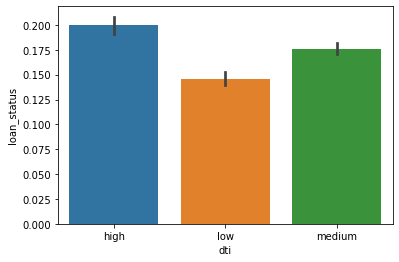

In [303]:
# Bar graph for loan status and dti (debt to income ratio).
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'
    

df2['dti'] = df2['dti'].apply(lambda x: dti(x))

sns.barplot(x="dti", y='loan_status', data=df2)

<AxesSubplot:xlabel='annual_inc', ylabel='loan_status'>

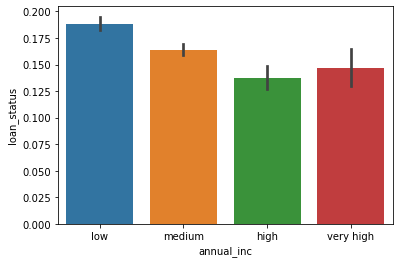

In [304]:
# Bar graph for loan status and annual income.
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

df2['annual_inc'] = df2['annual_inc'].apply(lambda x: annual_income(x))

sns.barplot(x='annual_inc', y='loan_status', data=df2)

<AxesSubplot:xlabel='funded_amnt', ylabel='loan_status'>

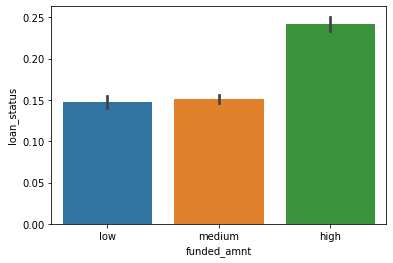

In [305]:
# Bar graph for loan status and funded amount.
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
df2['funded_amnt'] = df2['funded_amnt'].apply(lambda x: funded_amount(x))
sns.barplot(x="funded_amnt", y='loan_status', data=df2)

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

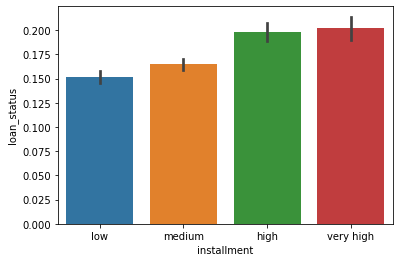

In [306]:
# Bar graph for loan status and installment.
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'
    
df2['installment'] = df2['installment'].apply(lambda x: installment(x))
sns.barplot(x="installment", y='loan_status', data=df2)

<AxesSubplot:xlabel='installment', ylabel='loan_status'>

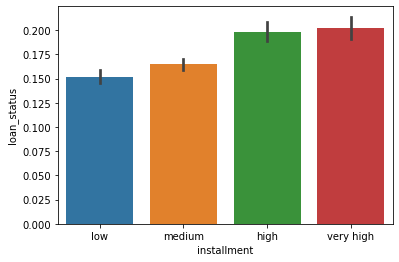

In [307]:
# Bar graph for loan status and Employment length.
df2 = df2[~df2['emp_length'].isnull()]

def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

df2['emp_length'] = df2['emp_length'].apply(lambda x: emp_length(x))
sns.barplot(x="installment", y='loan_status', data=df2)

# Segmented Univariate Analysis

<AxesSubplot:xlabel='purpose', ylabel='loan_status'>

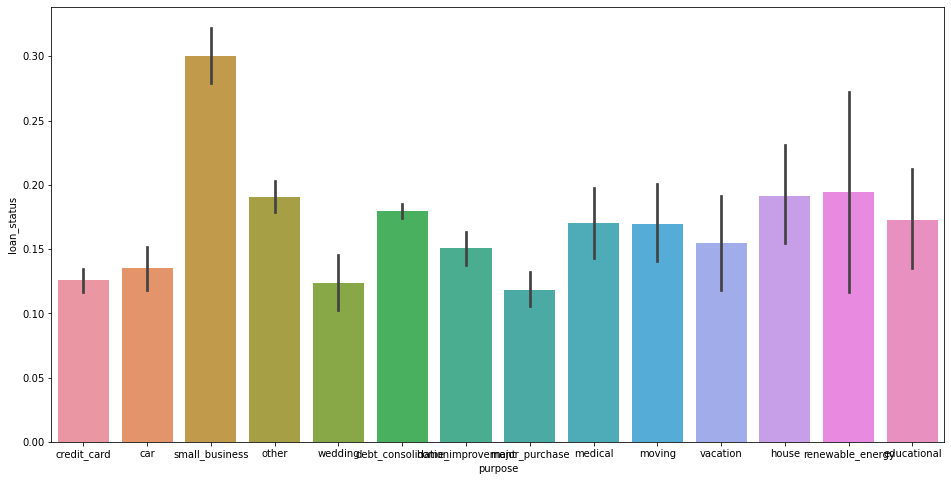

In [308]:
# Bar graph for loan status and purpose.
plt.figure(figsize=(16, 8))
sns.barplot(x='purpose', y='loan_status', data=df2)

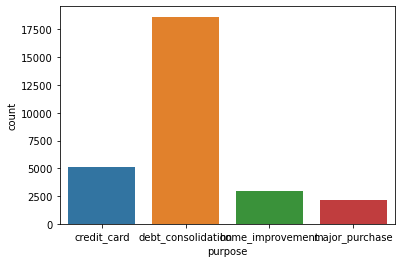

In [309]:
# filtering the df for the 4 types of loans mentioned above
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df2 = df2[df2['purpose'].isin(main_purposes)]
df2['purpose'].value_counts()

# plotting number of loans by purpose 
sns.countplot(x=df2['purpose'])
plt.show()

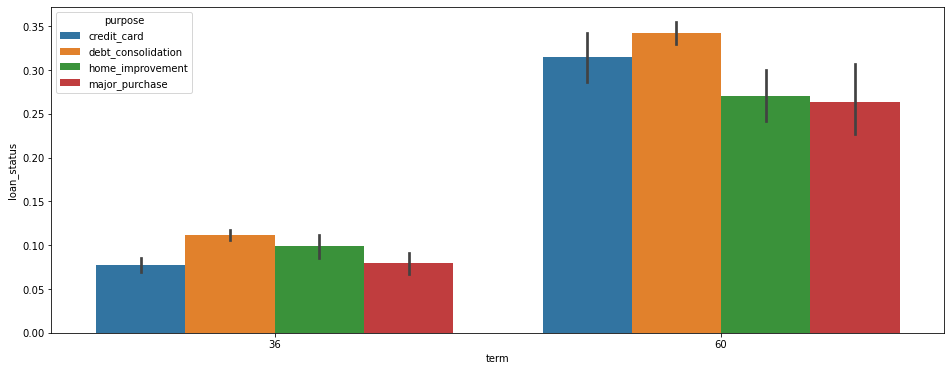

In [310]:
# let's now compare the default rates across two types of categorical variables.
# purpose of loan (constant) and another categorical variable (which changes).
# Bar graph for loan status and term with purpose.

plt.figure(figsize=[16, 6])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df2)
plt.show()

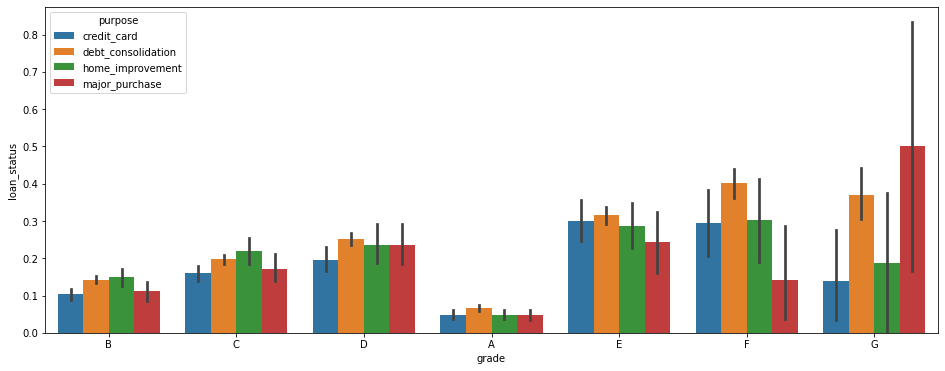

In [311]:
# Bar graph for loan status and grade with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x='grade', y="loan_status", hue='purpose', data=df2)
plt.show()

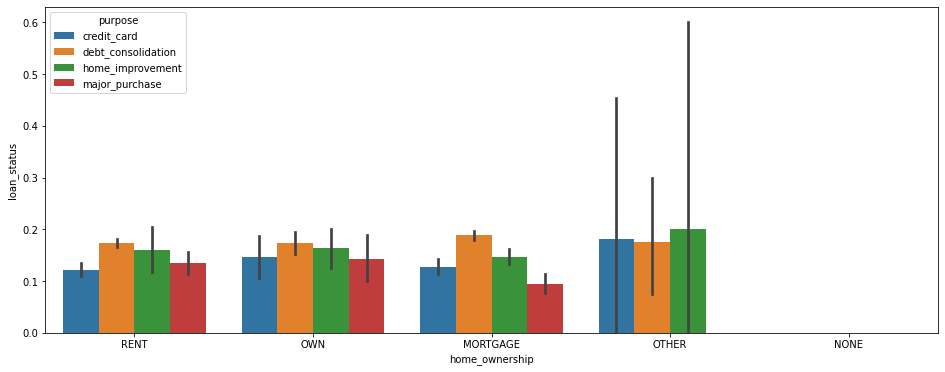

In [312]:
# Bar graph for loan status and home ownership with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x='home_ownership', y="loan_status", hue='purpose', data=df2)
plt.show()

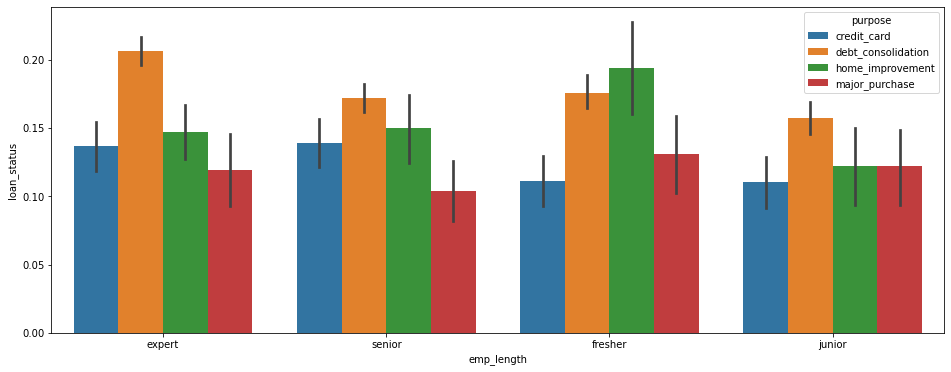

In [313]:
# Bar graph for loan status and emp length with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x='emp_length', y="loan_status", hue='purpose', data=df2)
plt.show()

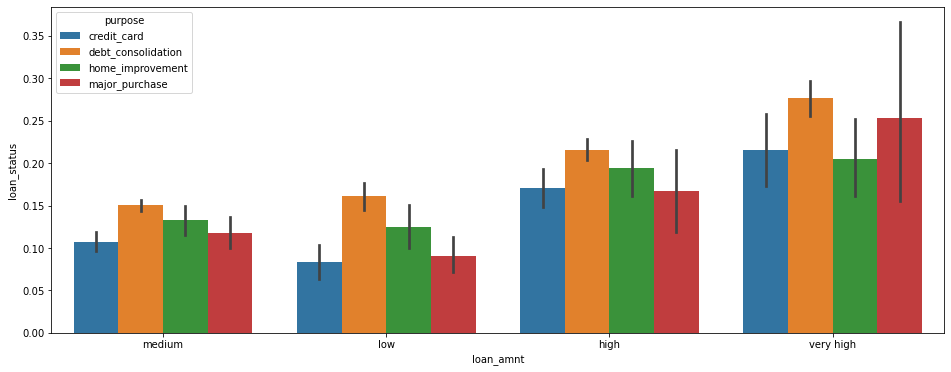

In [314]:
# Bar graph for loan status and loan amount with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x = 'loan_amnt', y="loan_status", hue='purpose', data=df2)
plt.show()

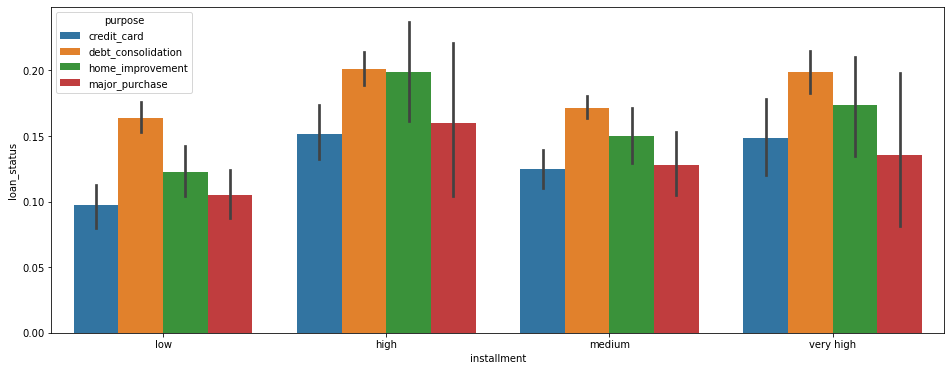

In [315]:
# Bar graph for loan status and installment with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x = 'installment' , y="loan_status", hue='purpose', data=df2)
plt.show()

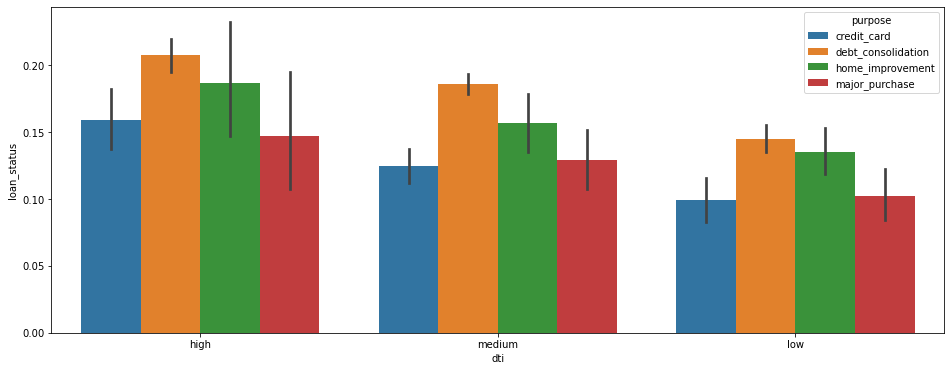

In [316]:
# Bar graph for loan status and dti with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x = 'dti' , y="loan_status", hue='purpose', data=df2)
plt.show()

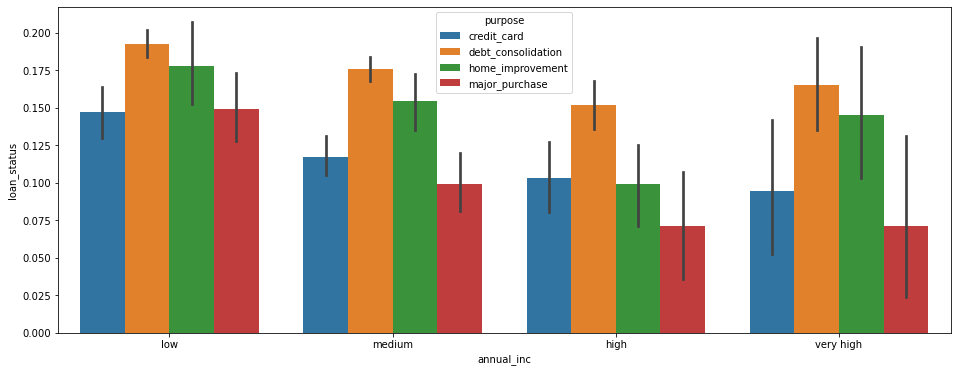

In [317]:
# Bar graph for loan status and annual inc with purpose.
plt.figure(figsize=[16, 6])
sns.barplot(x = 'annual_inc' , y="loan_status", hue='purpose', data=df2)
plt.show()

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  39717 non-null  int64  
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

### Label Encoding

In [358]:
df2.nunique()

id                            39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
purpose                          14
title                         19615
addr_state                       50
dti                            2868
initial_list_status               1
collections_12_mths_ex_med        1
policy_code                       1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
pub_rec_bankruptcies              3
dtype: int64

In [359]:
df2.drop(['title'], axis = 1, inplace = True)

In [360]:
df_3 = df2

In [361]:
Object_list = list(df_3.select_dtypes(['object']).columns)
Object_list

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status']

In [208]:
# Import label encoder for single column
# from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
# df_3= label_encoder.fit(df_3)
  
# df[Object_list].unique()

In [364]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
df_3[Object_list] = df_3[Object_list].apply(LabelEncoder().fit_transform)

In [365]:
df_3.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,1,6,10,...,1,3,27.65,0,0.0,1,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,2,13,1,...,0,10,1.00,0,0.0,1,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,2,14,10,...,11,14,8.72,0,0.0,1,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,2,10,10,...,9,4,20.00,0,0.0,1,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,1,9,1,...,9,36,17.94,0,0.0,1,0,0.0,0,0.0


In [366]:
#dropping the id column
df_3.drop(['id'], axis = 1, inplace = True)

In [367]:
df4 = df_3
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,purpose,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,1,6,10,4,...,1,3,27.65,0,0.0,1,0,0.0,0,0.0
1,2500,2500,2500.0,60,15.27,59.83,2,13,1,4,...,0,10,1.00,0,0.0,1,0,0.0,0,0.0
2,2400,2400,2400.0,36,15.96,84.33,2,14,10,4,...,11,14,8.72,0,0.0,1,0,0.0,0,0.0
3,10000,10000,10000.0,36,13.49,339.31,2,10,10,4,...,9,4,20.00,0,0.0,1,0,0.0,0,0.0
4,3000,3000,3000.0,60,12.69,67.79,1,9,1,4,...,9,36,17.94,0,0.0,1,0,0.0,0,0.0


# Model Training and Testing

#### Split Data into Test and Training Data Sets

In [368]:
# Split the data into training and test data sets.
# First we need to divide our data into x values (the data we will  # use to make predictions) 
# and y values (the data we are attempting to predict).

from sklearn.model_selection import train_test_split
    
x_data = df4.drop('loan_status', axis = 1) 
y_data = df4['loan_status']
# Use train_test_split function to generate training data and test  # data. Test data set is 30% of original data set. 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state=42)

##### Normalize the feature datasets.

In [369]:
# Normalize the feature datasets. StandardScaler will transform the # data so that its distribution will have a mean value 0 and        # standard deviation of 1. 

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

We will now train models, make predictions and evaluate the performance using five different models.

##### Logistic Regression Model

In [370]:
# Create an instance of the classifier and assign it to a model     # variable. 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model_lg = LogisticRegression()
# Train the model using the fit method and training data. 
model_lg.fit(x_train, y_train)
# Make predictions on the test data. 
predictions_lr = model_lg.predict(x_test)
# Calculate the Accuracy Score.
lg = accuracy_score(y_test, predictions_lr)
print(lg)

0.8312353138637126


<AxesSubplot:>

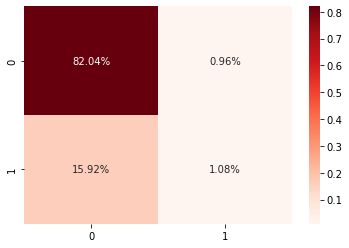

In [371]:
# Show Confusion Maxtrix.
cm1 = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm1/np.sum(cm1), annot = True, fmt=  '0.2%', cmap = 'Reds')

The logistic regression model correctly predicted 83.12% of the loans to be good or bad.

        82.04% correctly predicted loans to be good.

        1.08% correctly predicted loans to go bad.

16.88% of the loans were incorrectly predicted to be good or bad.

        0.96% incorrectly predicted loans to go bad.

        15.92% incorrectly predicted loans to be good.

##### Decision Tree Model

In [372]:
# Create an instance of the classifier and assign it to a model     # variable. 

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion = 'entropy', random_state=42)
# Train the Model using the fit method and training data. 
model_dt.fit(x_train, y_train)
# Make predictions on the test data. 
predictions_dt = model_dt.predict(x_test)
# Calculate the Accuracy Score.
dt = accuracy_score(y_test, predictions_dt)
print(dt)

0.7362369922792884


<AxesSubplot:>

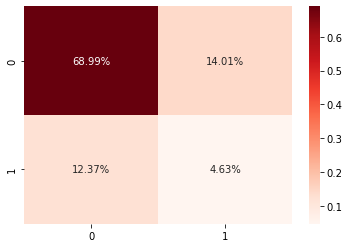

In [373]:
# Show Confusion Maxtrix
cm2 = confusion_matrix(y_test, predictions_dt)
sns.heatmap(cm2/np.sum(cm2), annot = True, fmt=  '0.2%', cmap = 'Reds')

##### Random Forrest Model

In [374]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier and assign it to a model     # variable. 
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10)
# Train the model using the fit method and training data.
model_rf.fit(x_train, y_train)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test)
# Calculate the Accuracy Score.
rf = accuracy_score(y_test, predictions_rf)
print(rf)

0.8301443437395098


<AxesSubplot:>

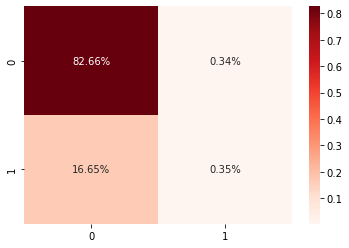

In [375]:
# Show Confusion Maxtrix
cm3 = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm3/np.sum(cm3), annot = True, fmt=  '0.2%', cmap = 'Reds')

##### K Nearest Neighbors

In [378]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the classifier and assign it to a model     # variable. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Train the model using the fit method and training data.
model_kn.fit(x_train, y_train)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test)
# Calculate the Accuracy Score.
kn = accuracy_score(y_test, predictions_kn)
print(kn)

0.8199899295065458


<AxesSubplot:>

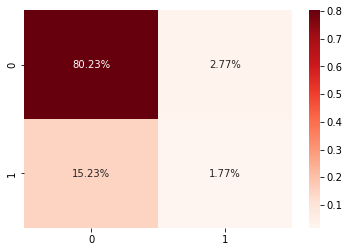

In [379]:
# Show Confusion Maxtrix
cm4 = confusion_matrix(y_test, predictions_kn)
sns.heatmap(cm4/np.sum(cm4), annot = True, fmt=  '0.2%', cmap = 'Reds')

##### Support Vector Machine (SVC)

In [381]:
from sklearn.svm import SVC

# Create an instance of the classifier and assign it to a model variable. 
model_svc = SVC()
# Train the model using the fit method and training data.
model_svc.fit(x_train, y_train)
# Make predictions on the test data. 
predictions_svc = model_svc.predict(x_test)
# Calculate the Accuracy Score.
svc = accuracy_score(y_test, predictions_svc)
print(svc)

0.8301443437395098


<AxesSubplot:>

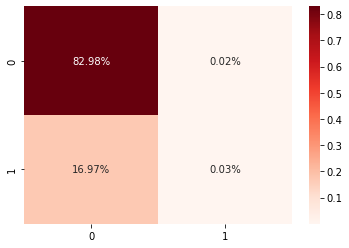

In [382]:
# Show Confusion Maxtrix
cm5 = confusion_matrix(y_test, predictions_svc)
sns.heatmap(cm5/np.sum(cm5), annot = True, fmt=  '0.2%', cmap = 'Reds')

,Model,Accuracy_score
0,Logistic Regression,0.831235
2,Random Forest,0.830144
4,Support Vector Machine,0.830144
3,KNeighbours,0.819990
1,Decision Tree,0.736237


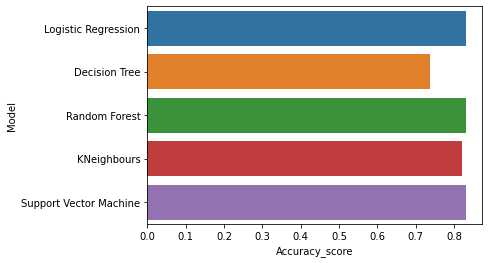

In [387]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[lg, dt, rf, kn, svc]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score',ascending=False)